<a href="https://colab.research.google.com/github/nurayuasyifa/investigate-hotel-business-using-data-visualization/blob/main/Mini_Project_2_Nur_Ayu_Asyifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages and Dataset

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Mini Project 2/hotel_bookings_data.csv')

In [ ]:
dfc = df.copy()

In [ ]:
dfc.iloc[:,:14].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka


In [ ]:
dfc.iloc[:,15:].head()

,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Task 1 : Cleaning Data

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handling Missing Values

In [ ]:
#check missimng value in every columns
dfc.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
#persentase null
round(dfc.isnull().sum()/dfc.shape[0],5)

hotel                             0.00000
is_canceled                       0.00000
lead_time                         0.00000
arrival_date_year                 0.00000
arrival_date_month                0.00000
arrival_date_week_number          0.00000
arrival_date_day_of_month         0.00000
stays_in_weekend_nights           0.00000
stays_in_weekdays_nights          0.00000
adults                            0.00000
children                          0.00003
babies                            0.00000
meal                              0.00000
city                              0.00409
market_segment                    0.00000
distribution_channel              0.00000
is_repeated_guest                 0.00000
previous_cancellations            0.00000
previous_bookings_not_canceled    0.00000
booking_changes                   0.00000
deposit_type                      0.00000
agent                             0.13686
company                           0.94307
days_in_waiting_list              

**observations:**<br>
- Columns have null values : `children`, `city`, `agent`, `company`
- null value in column `children` can be drop
-null value in `city` and `agent` can be imputed 
- columns `company` will be drop because value in column `company` 94% is null

In [ ]:
dfc = dfc.drop(columns='company',axis=1)

In [ ]:
#separate dtype numeric and string
nums = []
cats = []

for i in dfc.columns :
    if dfc[i].dtypes == 'object':
        cats.append(i)
    else :
        nums.append(i)

In [ ]:
#numerical feature
dfc[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


**Observations:**
- `adr` column has negative value should be dropped because `adr` column is Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [ ]:
#filter adr > 0
dfc = dfc[dfc['adr']>0]

In [ ]:
#categorical feature
dfc[cats].describe().transpose()

,count,unique,top,freq
hotel,117430,2,City Hotel,78122
arrival_date_month,117430,12,October,13711
meal,117430,5,Breakfast,90814
city,116963,177,Kota Denpasar,47040
market_segment,117430,8,Online TA,56110
distribution_channel,117430,5,TA/TO,96913
deposit_type,117430,3,No Deposit,102681
customer_type,117430,4,Personal,88163
reservation_status,117430,3,Check-Out,73419


In [ ]:
#handling missing value
dfc['agent'].fillna(dfc['agent'].median(),inplace=True)
dfc.dropna(subset=['children'],inplace=True)
dfc['city'].fillna('Kota Denpasar', inplace=True)

In [ ]:
#recheck null values
dfc.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
for col in cats:
    print(f'''Value count column {col}:''')
    print(dfc[col].value_counts())
    print('---'*10, '\n')

Value count column hotel:
City Hotel      78118
Resort Hotel    39308
Name: hotel, dtype: int64
------------------------------ 

Value count column arrival_date_month:
October      13707
September    12491
July         11611
June         10953
December     10929
August       10819
November     10351
May           9641
April         7921
January       6641
February      6561
March         5801
Name: arrival_date_month, dtype: int64
------------------------------ 

Value count column meal:
Breakfast     90810
Dinner        14262
No Meal       10441
Undefined      1131
Full Board      782
Name: meal, dtype: int64
------------------------------ 

Value count column city:
Kota Denpasar              47503
Kabupaten Bangka           12055
Kota Yogyakarta            10360
Kota Batu                   8489
Kabupaten Bandung           7246
                           ...  
Kabupaten Malang               1
Kabupaten Barito Kuala         1
Kabupaten Bekasi               1
Kota Palembang             

**Observations:**
- `meal` and `distribution_channel` columns have label ``Undefined``
- ``undefined`` label in `meal` column is replaced by ``breakfast`` as mode value from columns `meal`
- ``undefined`` label in `distribution_channel` column is replaced by ``TA/TO`` as mode value from columns `distribution_channel` 

In [ ]:
#replace label
dfc['meal'].replace({'Undefined':'Breakfast'},inplace=True)
dfc['distribution_channel'].replace({'Undefined':'TA/TO'},inplace=True)

In [ ]:
#recheck label
for col in ['meal','distribution_channel']:
    print(f'''Value count column {col}:''')
    print(dfc[col].value_counts())
    print('---'*10, '\n')

Value count column meal:
Breakfast     91941
Dinner        14262
No Meal       10441
Full Board      782
Name: meal, dtype: int64
------------------------------ 

Value count column distribution_channel:
TA/TO        96914
Direct       13838
Corporate     6485
GDS            189
Name: distribution_channel, dtype: int64
------------------------------ 



In [ ]:
#calculate total guest
dfc[['adults','children','babies']].sample(5)

,adults,children,babies
17843,3,0.0,0
14050,1,0.0,0
82342,2,0.0,0
1193,2,0.0,0
51123,2,0.0,0


In [ ]:
#check unique value from children and babies
print(pd.unique(dfc['children']))
print(pd.unique(dfc['babies']))

[ 0.  1.  2. 10.  3.]
[ 0  1  2 10  9]


In [ ]:
dfc.shape

(117426, 28)

In [ ]:
dfc[['adults','children','babies']][(dfc['adults']==0) & (dfc['children']==0) & (dfc['babies']==0)]

,adults,children,babies
31765,0,0.0,0
47444,0,0.0,0
50701,0,0.0,0
50702,0,0.0,0
55809,0,0.0,0
78586,0,0.0,0
85931,0,0.0,0
88439,0,0.0,0
92814,0,0.0,0
92962,0,0.0,0


In [ ]:
#drop row that have 0 value in column adults, children, and babies
dfc.drop(dfc[(dfc['adults']==0) & (dfc['children']==0) & (dfc['babies']==0)].index,inplace=True)

In [ ]:
dfc.shape

(117395, 28)

In [ ]:
dfc[['adults','children','babies']][(dfc['adults']==0)]

,adults,children,babies
40984,0,3.0,0
41048,0,2.0,0
41446,0,2.0,0
45158,0,2.0,0
46132,0,3.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


In [ ]:
#drop row that children and babies more than 0 but have 0 in column adults 
dfc.drop(dfc[(dfc['adults']==0)].index,inplace=True)

In [ ]:
dfc.shape

(117178, 28)

In [ ]:
#new column : total guest
dfc['guest'] = dfc['adults']+dfc['children']+dfc['babies']

#drop column adults children babies
dfc.drop(columns=['adults','children','babies'],inplace=True)

In [ ]:
#recheck dataset
dfc.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
87782,City Hotel,0,44,2018,June,17,23,2,1,Breakfast,...,0,No Deposit,24.0,0,Family,95.0,0,1,Check-Out,2.0
54502,City Hotel,1,112,2018,September,30,18,1,2,Breakfast,...,0,No Deposit,9.0,0,Personal,105.3,0,0,Canceled,2.0
19561,Resort Hotel,0,7,2019,March,4,26,2,8,Breakfast,...,2,No Deposit,14.0,0,Personal,58.0,0,3,Check-Out,2.0
82908,City Hotel,1,82,2018,March,5,30,2,6,Breakfast,...,0,No Deposit,9.0,0,Contract,77.5,0,0,Canceled,2.0
86156,City Hotel,0,24,2018,May,13,26,1,1,Breakfast,...,0,No Deposit,9.0,0,Personal,141.0,0,1,Check-Out,2.0


## Handling Duplicated Data

In [ ]:
#recheck duplictates data
#dfc.duplicated().sum()

In [ ]:
#persentase = round(100*dfc.duplicated().sum()/dfc.shape[0],3)
#print('persentase duplicate data = ',persentase,'%')

In [ ]:
#drop duplicate data
#dfc.drop_duplicates(inplace=True)

In [ ]:
#recheck duplictates data
#dfc.duplicated().sum()

# Task 2



1.   Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)
2. Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)
3. Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)
4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)



In [ ]:
df1 = dfc.copy()

In [ ]:
df1.shape

(117178, 26)

In [ ]:
df1.iloc[:,:14].head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0


In [ ]:
df1.iloc[:,15:].head(3)

,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
2,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,1.0
3,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1.0
4,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0


## 1. 

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel<br> (Hint: Perhatikan data tahun kedatangan)

In [ ]:
dfg1 = df1.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','arrival_date_month':'count'}).rename(columns={'arrival_date_month':'number_of_booking'}).reset_index()
dfg1.columns = ['hotel','arrival_month','unique_year','number_of_booking']
dfg1

,hotel,arrival_month,unique_year,number_of_booking
0,City Hotel,April,2,4855
1,City Hotel,August,2,7802
2,City Hotel,December,2,7451
3,City Hotel,February,2,3985
4,City Hotel,January,2,4254
5,City Hotel,July,2,8102
6,City Hotel,June,2,7384
7,City Hotel,March,2,3652
8,City Hotel,May,2,6348
9,City Hotel,November,2,7269


## 2.

Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)

**Observations:**

data pada bulan september dan oktober diambil dari 3 tahun terakhir. Sedangkan, untuk bulan selain september dan oktober data diambil hanya dari 2 tahun terakhir.

In [ ]:
dfg1['avg_number_of_booking'] =  round(dfg1['number_of_booking']/dfg1['unique_year'])
dfg1

,hotel,arrival_month,unique_year,number_of_booking,avg_number_of_booking
0,City Hotel,April,2,4855,2428.0
1,City Hotel,August,2,7802,3901.0
2,City Hotel,December,2,7451,3726.0
3,City Hotel,February,2,3985,1992.0
4,City Hotel,January,2,4254,2127.0
5,City Hotel,July,2,8102,4051.0
6,City Hotel,June,2,7384,3692.0
7,City Hotel,March,2,3652,1826.0
8,City Hotel,May,2,6348,3174.0
9,City Hotel,November,2,7269,3634.0


## 3.

Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)

In [ ]:
months = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
dfg1['arrival_month'] = pd.Categorical(dfg1['arrival_month'], categories=months, ordered=True)

In [ ]:
dfg1_sorted = dfg1.sort_values(['hotel','arrival_month']).reset_index()

In [ ]:
dfg1_sorted = dfg1_sorted.drop('index',axis=1)
dfg1_sorted

,hotel,arrival_month,unique_year,number_of_booking,avg_number_of_booking
0,City Hotel,January,2,4254,2127.0
1,City Hotel,February,2,3985,1992.0
2,City Hotel,March,2,3652,1826.0
3,City Hotel,April,2,4855,2428.0
4,City Hotel,May,2,6348,3174.0
5,City Hotel,June,2,7384,3692.0
6,City Hotel,July,2,8102,4051.0
7,City Hotel,August,2,7802,3901.0
8,City Hotel,September,3,7945,2648.0
9,City Hotel,October,3,8824,2941.0


## 4.

Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)

In [ ]:
df_ch = dfg1_sorted[dfg1_sorted['hotel']=='City Hotel'].copy()
df_rh = dfg1_sorted[dfg1_sorted['hotel']=='Resort Hotel'].copy()

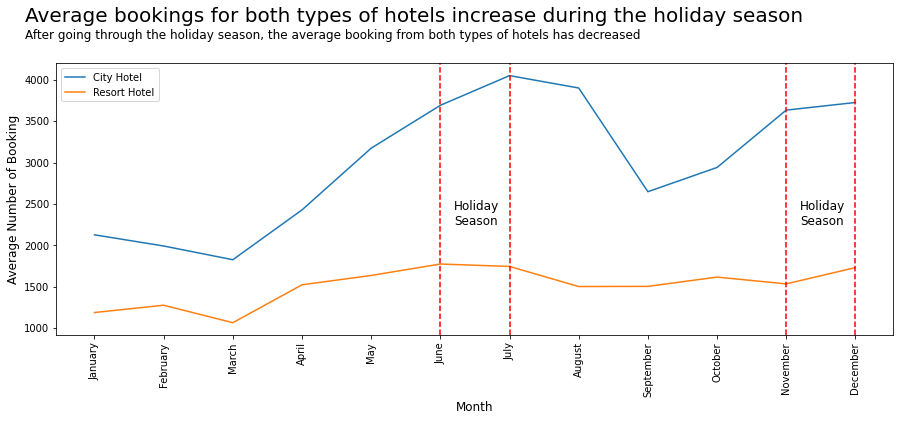

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_ch['arrival_month'],y=df_ch['avg_number_of_booking'],label='City Hotel')
sns.lineplot(x=df_rh['arrival_month'],y=df_rh['avg_number_of_booking'],label='Resort Hotel')
plt.text(x=-1,y=4700,s="Average bookings for both types of hotels increase during the holiday season",fontsize=20)
plt.text(x=-1,y=4500,s="After going through the holiday season, the average booking from both types of hotels has decreased",fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Average Number of Booking',fontsize=12)
plt.xticks(rotation=90)
plt.axvline('June', color='red', linestyle='--')
plt.axvline('July', color='red', linestyle='--')
plt.axvline('November', color='red', linestyle='--')
plt.axvline('December', color='red', linestyle='--')
plt.text(x=5.2,y=2250,s='Holiday\nSeason',fontsize=12)
plt.text(x=10.2,y=2250,s='Holiday\nSeason',fontsize=12)
plt.show()
plt.savefig('Average Number of Booking')

## 5.

Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia) <br>

Berdasarkan grafik di atas, pemesanan hotel rata-rata mengalami kenaikan pada musim liburan. Kenaikan tertinggi ada pada bulan juni - juli saat masa mudik lebaran dan libur sekolah. Pada akhir tahun (november - desember) rata-rata pemesanan hotel juga mengalami kenaikan tapi tidak sebesar bulan juni - juli.

# Task 3

1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

In [ ]:
df2 = dfc.copy()

In [ ]:
df2.shape

(117178, 26)

## 1.

Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)

In [ ]:
df2.iloc[:,:14].head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0


In [ ]:
df2.iloc[:,15:].head(3)

,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
2,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,1.0
3,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1.0
4,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0


**Observation:**
- stays_in_weekend_nights	
- stays_in_weekdays_nights

In [ ]:
#new columns duration of stay
df2['duration_of_stay'] = df2['stays_in_weekend_nights']+df2['stays_in_weekdays_nights']
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,duration_of_stay
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,...,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,...,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,...,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,...,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,Breakfast,...,No Deposit,14.0,0,Personal,107.0,0,0,Check-Out,2.0,2


## 2. 

Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)

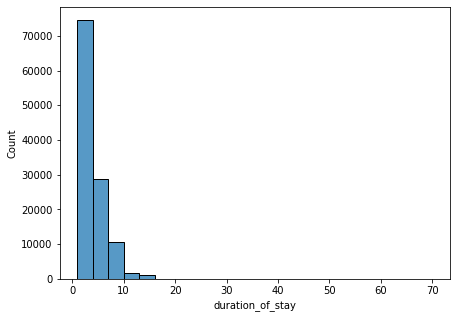

In [ ]:
#distribution
plt.figure(figsize=(7,5))
sns.histplot(data=df2, x="duration_of_stay", binwidth=3)
plt.show()

**Observation :**
- Distribusi data *skewed*
- Untuk durasi menginap yang lebih dari 14 hari akan dikelompokkan menjadi satu di `duration_of_stay` 15

In [ ]:
df2['duration_of_stay']=np.where(df2['duration_of_stay']>14,15,df2['duration_of_stay'])

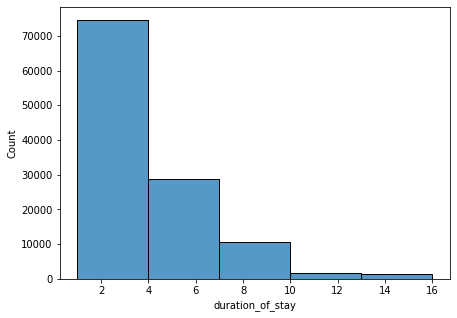

In [ ]:
#recheck distribution
plt.figure(figsize=(7,5))
sns.histplot(data=df2, x="duration_of_stay", binwidth=3)
plt.show()

## 3. 

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)

In [ ]:
dfg2 = df2.groupby(['hotel','is_canceled','duration_of_stay']).agg({'duration_of_stay':'count'}).rename(columns={'duration_of_stay':'num_of_booking'}).reset_index()
dfg2_pivot = pd.pivot_table(dfg2,index=['hotel','duration_of_stay'],columns ='is_canceled',values='num_of_booking').reset_index()
dfg2_pivot['persentase_canceled'] = round(dfg2_pivot[1]*100/(dfg2_pivot[1]+dfg2_pivot[0]),3)
dfg2_pivot.columns = ['hotel','duration_of_stay','not_canceled','canceled','persetase_canceled']
dfg2_pivot

is_canceled,hotel,duration_of_stay,0,1,persentase_canceled
0,City Hotel,1,8759,4042,31.576
1,City Hotel,2,10744,10402,49.191
2,City Hotel,3,11772,9452,44.534
3,City Hotel,4,7643,4817,38.660
4,City Hotel,5,3186,1768,35.688
5,City Hotel,6,1102,933,45.848
6,City Hotel,7,1240,801,39.245
7,City Hotel,8,204,174,46.032
8,City Hotel,9,116,93,44.498
9,City Hotel,10,80,116,59.184


## 4.

Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)

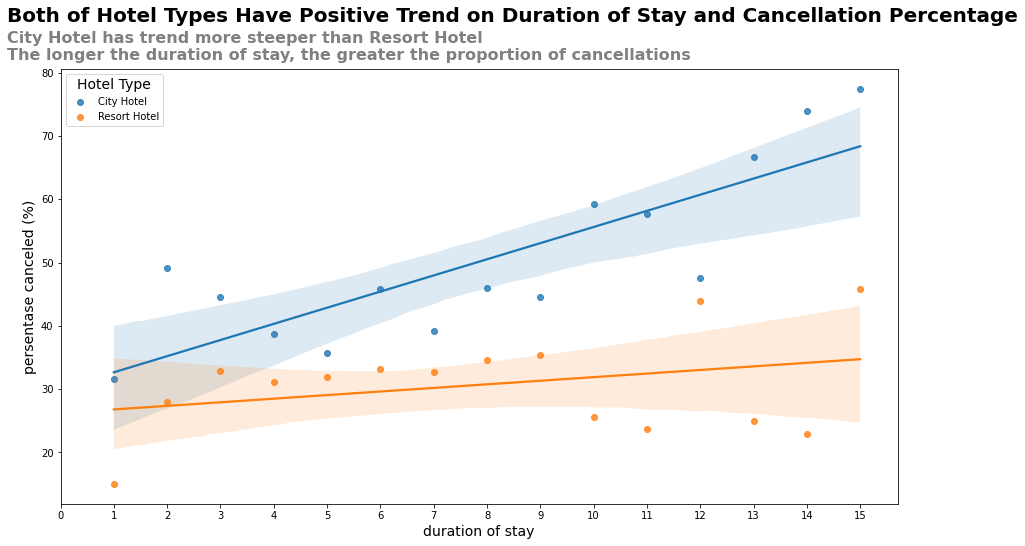

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x='duration_of_stay',y='persentase_canceled',data=dfg2_pivot[dfg2_pivot['hotel']=='City Hotel'],label='City Hotel')
sns.regplot(x='duration_of_stay',y='persentase_canceled',data=dfg2_pivot[dfg2_pivot['hotel']=='Resort Hotel'],label='Resort Hotel')
plt.legend(title='Hotel Type', title_fontsize=14)
plt.text(x=-1,y=88,s='Both of Hotel Types Have Positive Trend on Duration of Stay and Cancellation Percentage',fontsize=20,fontweight='bold')
plt.text(x=-1,y=82,s='City Hotel has trend more steeper than Resort Hotel\nThe longer the duration of stay, the greater the proportion of cancellations',fontsize=16,color='gray',fontweight='bold')
plt.xlabel('duration of stay',fontsize=14)
plt.ylabel('persentase canceled (%)',fontsize=14)
plt.xticks(range(0,16))
plt.show()
plt.savefig('Trend Hotel.png')

## 5.

Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

Analisis ini berfokus pada bagaimana durasi menginap dapat mempengaruhi tingkat pembatalan pemesanan hotel. Trend menunjukkan bahwa semakin panjang durasi seseorang menginap maka persentase pembatalan juga akan semakin besar. Jika ditinjau berdasarkan trend, Persentase pembatalan untuk tipe hotel kota (City Hotel) lebih tinggi dibandingkan engan tipe hotel Resort (Hotel Resort).

# Task 4

1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

In [ ]:
df3 = dfc.copy()

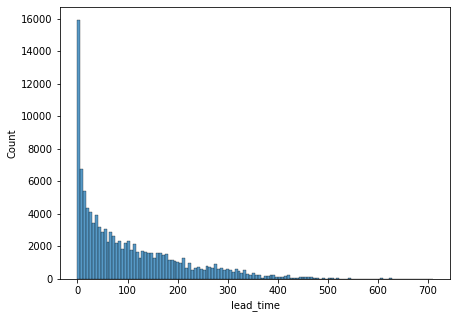

In [ ]:
#check distribution lead_time (satuannya hari)
plt.figure(figsize=(7,5))
sns.histplot(x='lead_time',data=df3)
plt.show()

**Observations :**
- Data *skewed*
- Untuk `lead_time` > 400 dikelompokkan menjadi satu group 401

## 1.

Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)

In [ ]:
# lead_time > 400 groupping in group 401
df3['lead_time_new']=np.where(df3['lead_time']>400,401,df3['lead_time'])

In [ ]:
list(np.arange(0,max(df3['lead_time_new'])+30,30))

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]

In [ ]:
bins = list(np.arange(0,max(df3['lead_time_new'])+30,30))
label = ["category {0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_time_new'], bins=bins, labels=label, include_lowest=True)
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,lead_time_new,lead_time_group
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,...,14.0,0,Personal,75.0,0,0,Check-Out,1.0,7,category 0-30
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,...,304.0,0,Personal,75.0,0,0,Check-Out,1.0,13,category 0-30
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,...,240.0,0,Personal,98.0,0,1,Check-Out,2.0,14,category 0-30
5,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,...,240.0,0,Personal,98.0,0,1,Check-Out,2.0,14,category 0-30
6,Resort Hotel,0,0,2017,September,27,1,0,2,Breakfast,...,14.0,0,Personal,107.0,0,0,Check-Out,2.0,0,category 0-30


In [ ]:
df3.groupby('lead_time_group').agg({'lead_time_group':'count'}).rename(columns={'lead_time_group':'num_of_booking'}).reset_index().sort_values('lead_time_group')

,lead_time_group,num_of_booking
0,category 0-30,37206
1,category 30-60,16779
2,category 60-90,12462
3,category 90-120,10366
4,category 120-150,8078
5,category 150-180,7806
6,category 180-210,5610
7,category 210-240,4275
8,category 240-270,3373
9,category 270-300,3401


In [ ]:
df3[['lead_time','lead_time_group']][df3['lead_time']>400].sample(3)

,lead_time,lead_time_group
70455,448,category 390-420
114102,423,category 390-420
60418,489,category 390-420


## 2. 

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)

In [ ]:
dfg3 = df3.groupby(['hotel','is_canceled','lead_time_group']).agg({'lead_time_group':'count'}).rename(columns={'lead_time_group':'num_of_booking'}).reset_index()
dfg3_pivot = dfg3.pivot_table(index=['hotel','lead_time_group'],columns='is_canceled',values='num_of_booking').reset_index()
dfg3_pivot['persentase_canceled'] = round(dfg3_pivot[1]*100/(dfg3_pivot[0]+dfg3_pivot[1]),3)
dfg3_pivot.columns = ['hotel','lead_time_group','not_canceled','canceled','persentase_canceled']
dfg3_pivot

,hotel,lead_time_group,not_canceled,canceled,persentase_canceled
0,City Hotel,category 0-30,17263,5096,22.792
1,City Hotel,category 30-60,7182,4588,38.980
2,City Hotel,category 60-90,5149,3678,41.668
3,City Hotel,category 90-120,3922,3483,47.036
4,City Hotel,category 120-150,3035,2530,45.463
5,City Hotel,category 150-180,2431,2702,52.640
6,City Hotel,category 180-210,1774,1784,50.141
7,City Hotel,category 210-240,1215,1270,51.107
8,City Hotel,category 240-270,866,1226,58.604
9,City Hotel,category 270-300,648,1858,74.142


In [ ]:
print('average percentage of cancellations city hotel =',round(dfg3_pivot[dfg3_pivot['hotel']=='City Hotel']['persentase_canceled'].mean(),3),'%')
print('average percentage of cancellations resort hotel =',round(dfg3_pivot[dfg3_pivot['hotel']=='Resort Hotel']['persentase_canceled'].mean(),3),'%')

average percentage of cancellations city hotel = 56.256 %
average percentage of cancellations resort hotel = 38.191 %


## 3.

Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)

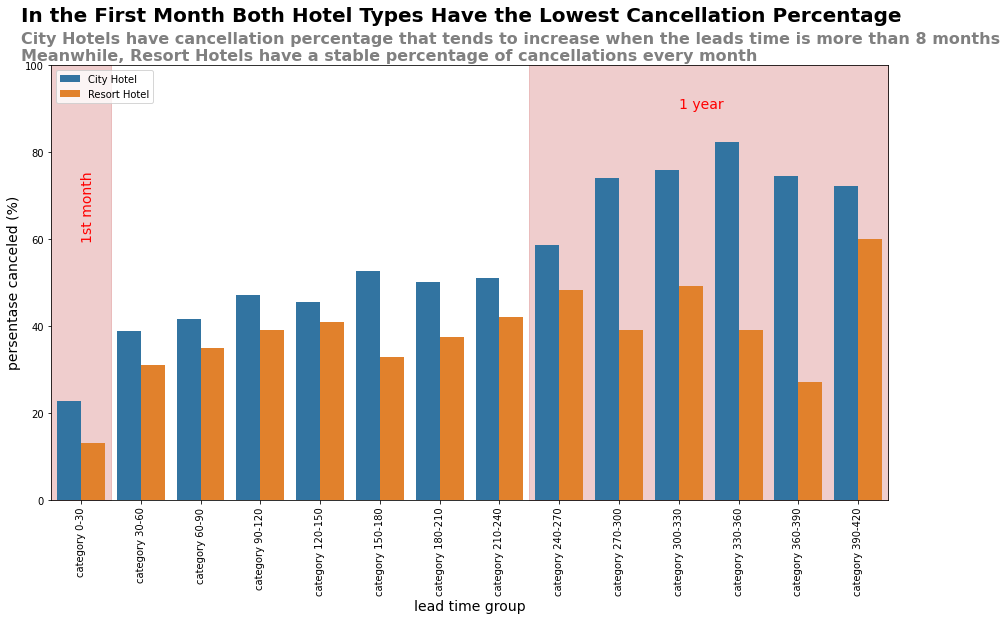

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='lead_time_group',y='persentase_canceled',hue='hotel',data=dfg3_pivot)
plt.legend(title='Hotel Type', title_fontsize=14)
plt.text(x=-1,y=110,s='In the First Month Both Hotel Types Have the Lowest Cancellation Percentage',fontsize=20,fontweight='bold')
plt.text(x=-1,y=101,s='City Hotels have cancellation percentage that tends to increase when the leads time is more than 8 months\nMeanwhile, Resort Hotels have a stable percentage of cancellations every month',fontsize=16,color='gray',fontweight='bold')
plt.text(x=0,y=60,s='1st month',fontsize=14,rotation=90,color='red')
plt.text(x=10,y=90,s='1 year',fontsize=14,color='red')
plt.legend(loc = 'upper left')
plt.stackplot(np.arange(-0.5,1), [[100]], color='indianred', alpha=0.3)
plt.stackplot(np.arange(7.5,14.5), [[100]], color='indianred', alpha=0.3)
plt.xlim(-0.5,13.5)
plt.ylim(0,100)
plt.xlabel('lead time group',fontsize=14)
plt.ylabel('persentase canceled (%)',fontsize=14)
plt.xticks(rotation=90)
plt.show()
plt.savefig('fig3.png')

## 4. 

Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

Analisis ini berfokus pada pengaruh dari lamanya waktu tunggu terhadap persentase pembatalan. Pada bulan pertama, persentase pembatalan dari kedua tipe hotel memiliki persentase paling rendah dibandingkan dengan bulan-bulan yang lain. City Hotel memiliki rata-rata persentase pembatalan sebesar 56.256 % sedangkan Resort Hotel sebesar 38.191 %. Semakin lama waktu tunggu persentase pembatalan cenderung semakin meningkat pada tipe city hotel, dapat terlihat dari bulan ke 8 hingga ke bulan selanjutnya. Sedangkan untuk tipe resort hotel cenderung stabil setiap bulannya.